In [2]:
import h5py
import numpy as np
import unyt
import swiftsimio as sw
from swiftsimio import load
import swiftgalaxy as sg
import functions as fn
from matplotlib import colors
import matplotlib.pyplot as plt
path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+'compare_most_massive_sat_3000kpc.hdf5','r')
s=f["PartType0"]
mostmassiveid3000=np.array(s["Brightid"])
cebtralid=np.array(s["centralid"])
R3000=np.array(s["Rmass"])
f.close()
f=h5py.File(path+'compare_most_massive_sat.hdf5','r')
s=f["PartType0"]
mostmassiveid=np.array(s["Brightid"])

R=np.array(s["Rmass"])
f.close()
f=h5py.File(path+'halos.hdf5','r')

halo_id=np.array(f["halos"]["id"])

r200=np.array(f["halos"]["r200"])
host_id=np.array(f["halos"]["hostid"])
mass=np.array(f["halos"]["mass"])
m200=np.array(f["halos"]["m200"])
mbp=np.array(f["halos"]["center"])
com_star=np.array(f["halos"]["com_star_100kpc"])
#star_lumz=np.array(f["halos"]["lumz_3000kpc"])
ms=np.array(f["halos"]["mass_star_100kpc"])
f.close()
ids=np.arange(0,len(halo_id),1)
mainhalo_id=ids[host_id==-1][R>1]
print(len(mainhalo_id))


995


In [ ]:


Miscenter=np.zeros(len(mainhalo_id))
i=0
for id in mainhalo_id:
  

  centre=mbp[id]
  
  r=r200[id]
  print(r,centre)
  sgi=sg.SWIFTGalaxy("/Users/24756376/data/Flamingo/L1000N0900/flamingo_0077.hdf5",
                   sg.Standalone(centre=centre*unyt.Mpc,velocity_centre=np.array([0,0,0])*
                                 unyt.km/unyt.s,spatial_offsets=[[-3,3],[-3,3],[-3,3]]*unyt.Mpc,extra_mask=None))
#  print(len(sgi.stars.spherical_coordinates.r))
  mask=sg.MaskCollection(dark_matter=(sgi.dark_matter.spherical_coordinates.r<3),
  #                    
                       
                       stars=sgi.stars.spherical_coordinates.r<3)
  print()
#  sgi.mask_particles(mask)
  xdm=np.array(sgi.dark_matter.cartesian_coordinates.x)
  ydm=np.array(sgi.dark_matter.cartesian_coordinates.y)
  zdm=np.array(sgi.dark_matter.cartesian_coordinates.z)
  fofdm=sgi.dark_matter.fofgroup_ids
  PartType2=np.array([xdm,ydm,zdm]).T
  
  p=np.array(sgi.dark_matter.potentials)
  print(xdm)
  minp=PartType2[p==np.min(p)][0]
  if fn.radial_distance(minp[0],minp[1],minp[2])>0.02:
    Miscenter[i]=fn.radial_distance(minp[0],minp[1],minp[2])
  i=i+1
print("Miscenter",Miscenter[Miscenter!=0])
print(len(Miscenter[Miscenter!=0]))


1.0488281 [  7.76451043   6.88795043 364.19551043]
[]


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/swiftsimio/_array_functions.py:438: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a at a=1.0) for all arguments.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/swiftgalaxy/reader.py:2077: RuntimeWarning: Translation assumed to be in comoving (not physical) coordinates.
  warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor ((a**2.0)**0.5 at a=1.0) for all arguments.
  warnings.warn(


ValueError: zero-size array to reduction operation minimum which has no identity

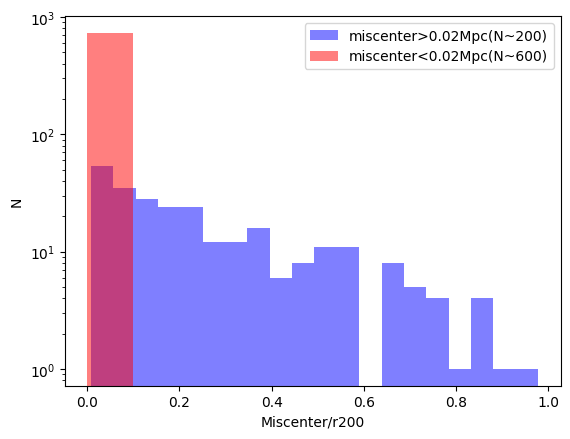

In [14]:
f=h5py.File(path+'Miscenter2.hdf5','r')
Mis=np.array(f["Miscenter"])
r200=np.array(f["r200"])
f.close()
plt.figure()
ax=plt.subplot(111)
ax.hist(Mis[Mis!=0]/r200[Mis!=0],alpha=0.5,
         label="miscenter>0.02Mpc(N~200)",color='blue',bins=20)
ax.hist(Mis[Mis==0],bins=[0,0.1],alpha=0.5,
         label="miscenter<0.02Mpc(N~600)",color='red')
ax.legend()
ax.set_xlabel("Miscenter/r200")
ax.set_ylabel("N")
ax.set_yscale("log")
plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/Miscenter2.png")